In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fights_stats = pd.read_csv('fight_with_stats.csv')
df_results = pd.read_csv('fight_result.csv')

In [3]:
df_fights_stats["year"] = pd.DatetimeIndex(df_fights_stats['DATE_Event']).year

In [4]:
df1 = df_fights_stats.groupby("year")["METHOD"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

In [5]:
df1.head()

,year,METHOD,percent
0,1994,Submission,65.517241
1,1994,KO/TKO - ground,24.137931
2,1994,KO/TKO - other,6.896552
3,1994,KO/TKO - clinch,3.448276
4,1995,Submission,52.941176


In [6]:
def agg_method(method):
    if method == "Submission":
        return "Submission"
    elif "KO/TKO" in method:
        return "KO/TKO"
    elif method == "Decision":
        return "Decision"
    else:
        return "Other"
        

In [7]:
agg_method('KO/TKO - ground')

'KO/TKO'

In [8]:
df1["METHOD"] = df1["METHOD"].apply(lambda x:agg_method(x))

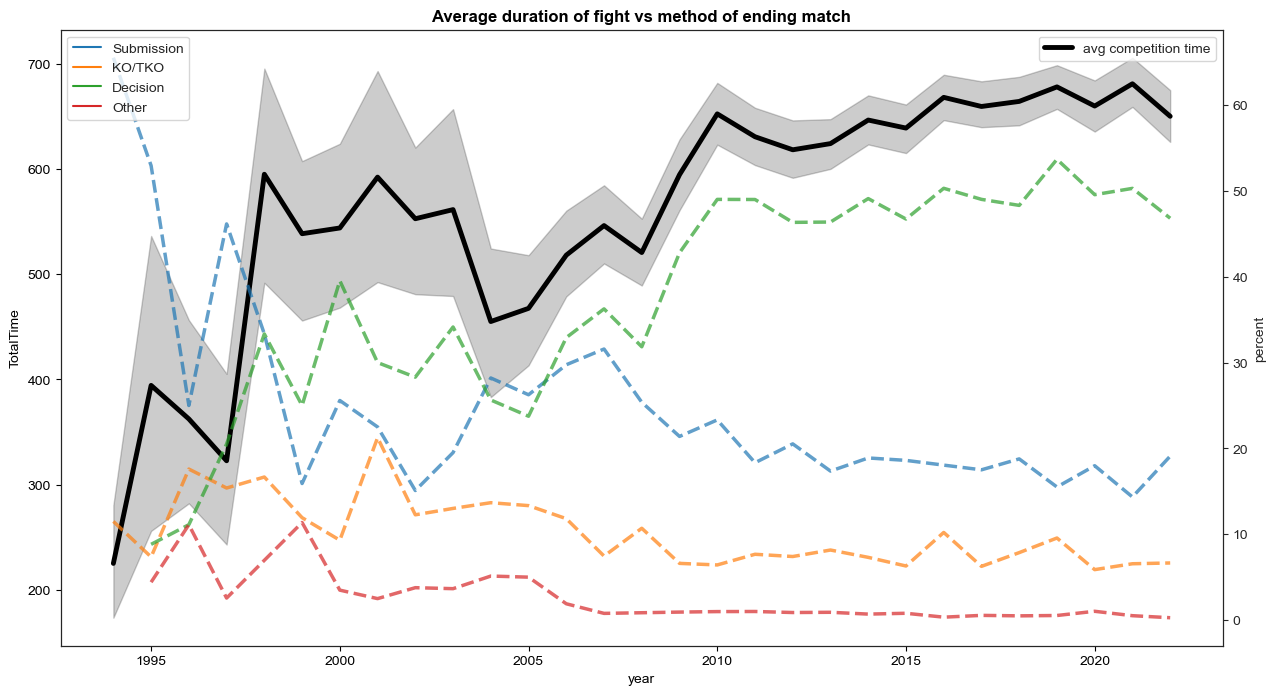

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("white")
g = sns.lineplot(x="year", y="TotalTime", data= df_fights_stats, color='black', ax=ax,linewidth = 3.5, label = "avg competition time" )
ax1=ax.twinx()
g1 = sns.lineplot(x="year",y='percent', hue ="METHOD",data=df1, linewidth = 2.5, ax=ax1,alpha=0.7,linestyle='--',ci=None)
g.set_title("Average duration of fight vs method of ending match", weight='bold')
g1.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

In [10]:
df_results['Women_fight'].sum()

627

In [14]:

fights_by_gender={"mens_fight": df_results.shape[0] - df_results['Women_fight'].sum(), "women's fights":df_results['Women_fight'].sum()}
names = list(fights_by_gender.keys())
values = list(fights_by_gender.values())

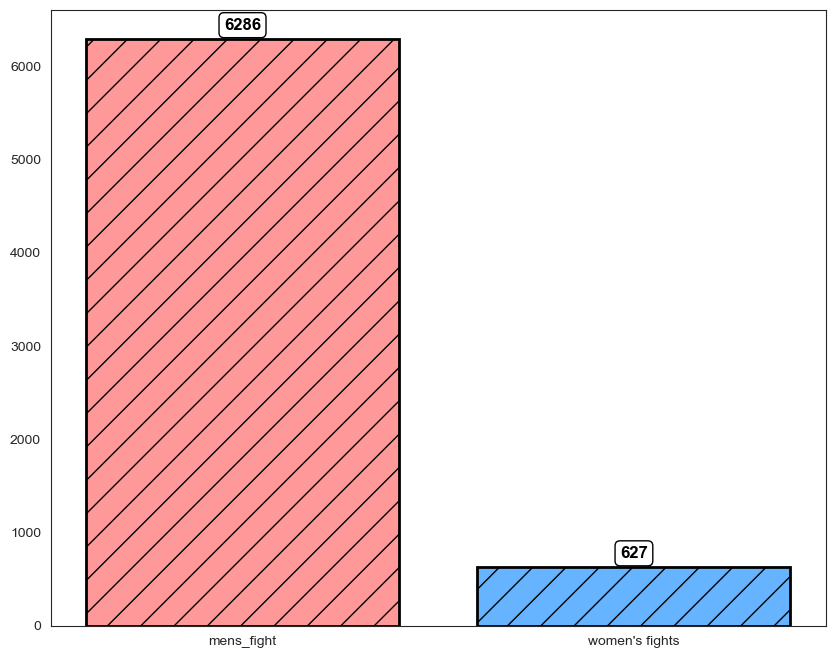

In [67]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(range(len(fights_by_gender)), values, tick_label=names,color=['#ff9999','#66b3ff'],edgecolor="black", hatch='/',linewidth=2)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()+70, p.get_height(), 
        fontsize=12, color='black', ha='center', va='bottom', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1))
plt.show()


In [27]:
df_fights_stats = df_fights_stats[df_fights_stats['Women_fight']==0]

In [42]:
a= df_fights_stats.groupby('AGE_fighter')['Win'].agg(['sum','count'])

In [46]:
a['pct'] = round(a['sum'] / a['count']*100,2)
a = a[a['count']>100]
a

,sum,count,pct
AGE_fighter,,,
22.0,115,207,55.56
23.0,210,361,58.17
24.0,282,524,53.82
25.0,376,732,51.37
26.0,494,934,52.89
27.0,589,1056,55.78
28.0,577,1134,50.88
29.0,576,1146,50.26
30.0,587,1165,50.39


In [48]:
from scipy.interpolate import make_interp_spline, BSpline

In [49]:
xnew = np.linspace(a.index.min(), a.index.max(), 200) 
spl = make_interp_spline(a.index,a['pct'], k=3)
y_smooth = spl(xnew)

<function matplotlib.pyplot.show(close=None, block=None)>

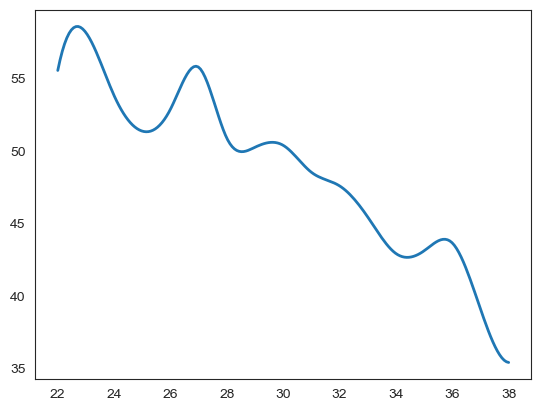

In [52]:
plt.plot(xnew,y_smooth,linewidth=2)
plt.show

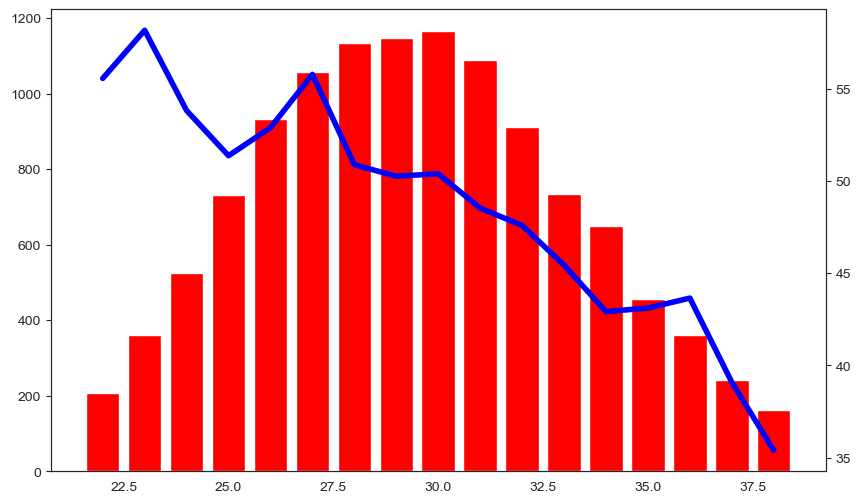

In [61]:
plt.figure(figsize=(10,6))

barchart = plt.bar(a.index, a['count'], color='red')
plt.twinx()
linechart = plt.plot(a.index,a['pct'], color='blue',linewidth=4)